In [2]:
# import python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# import csv file
df = pd.read_csv('bills.csv')

In [4]:
df.shape

(8523, 18)

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Shop Opening Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2023
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2023
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2023
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2023
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2023


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   float64
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage 

In [7]:
# drop null values
df.dropna(inplace=True)

In [8]:
#check for null values
pd.isnull(df).sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Shop Opening Year          0
dtype: int64

In [9]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Shop Opening Year'],
      dtype='object')

In [10]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


In [12]:
#Rename 'Total' column to 'Bills'
df.rename(columns={'Total': 'Bills'}, inplace=True)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Bills,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Shop Opening Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2023
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2023
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2023
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2023
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1.0,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,2023
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10.0,48.6900,1022.4900,03-02-2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2023
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1.0,1.5920,33.4320,02-09-2019,13:22,Cash,31.84,4.761905,1.5920,7.7,2023
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,2024


In [13]:
#Rename 'gross margin percentage' column to 'GMP'
df.rename(columns={'gross margin percentage':'GMP'}, inplace=True)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Bills,Date,Time,Payment,cogs,GMP,gross income,Rating,Shop Opening Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2023
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2023
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2023
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2023
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1.0,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,2023
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10.0,48.6900,1022.4900,03-02-2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2023
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1.0,1.5920,33.4320,02-09-2019,13:22,Cash,31.84,4.761905,1.5920,7.7,2023
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,2024


In [14]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Bills', 'Date',
       'Time', 'Payment', 'cogs', 'GMP', 'gross income', 'Rating',
       'Shop Opening Year'],
      dtype='object')

In [15]:
df.drop(columns=['gross income','GMP'],inplace=True )

# Exploratory Data Analysis

In [16]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

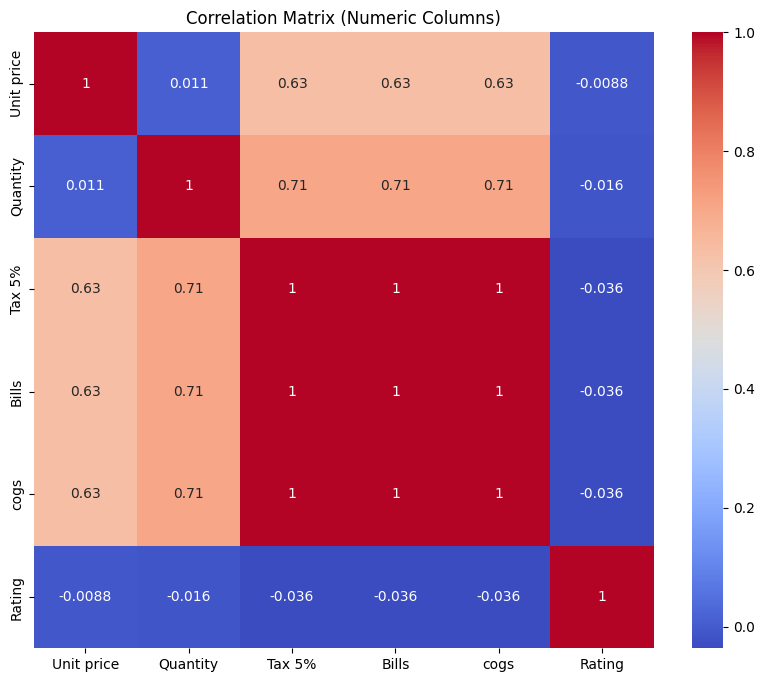

In [17]:
# Calculate correlation matrix on numeric columns
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Columns)')
plt.show()

*This code excludes non-numeric columns from correlation computation, avoiding conversion errors. Typically for correlation, focus only on numeric variables such as 'Unit price', 'Quantity', 'Tax 5%', 'Bills', 'Rating', etc.*

In [18]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Bills', 'Date',
       'Time', 'Payment', 'cogs', 'Rating', 'Shop Opening Year'],
      dtype='object')

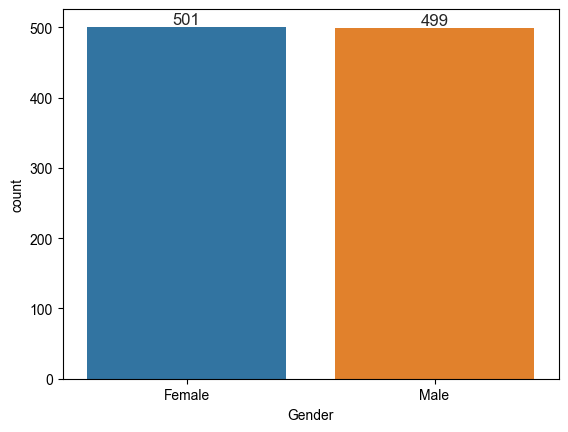

In [19]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df,hue = 'Gender')
sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Bills'>

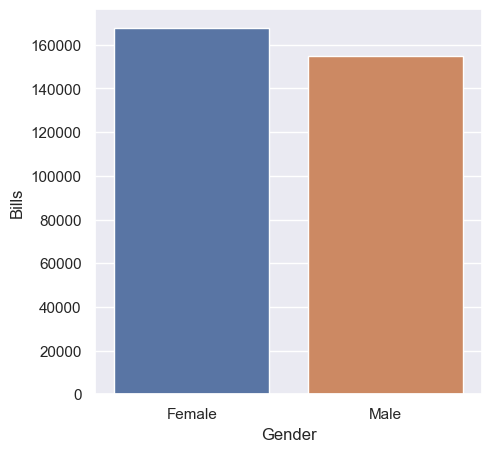

In [20]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Bills'].sum().sort_values(by='Bills', ascending=False)

sns.barplot(x = 'Gender',y= 'Bills' ,data = sales_gen,hue = 'Gender')

*From above graphs we can see that most of the buyers are females and even the Bills power of females are greater than men*

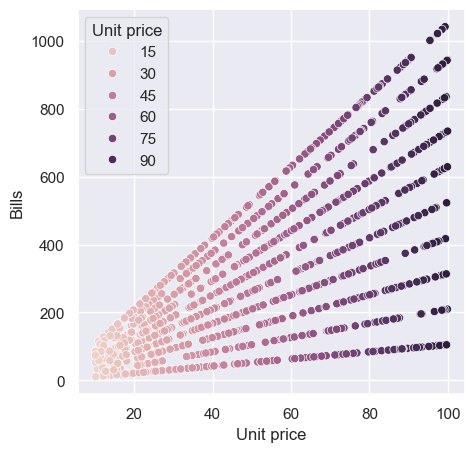

In [21]:
ax = sns.scatterplot(data = df, x = 'Unit price',y = 'Bills', hue = 'Unit price')

for bars in ax.containers:
    ax.bar_label(bars)

In [22]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Bills', 'Date',
       'Time', 'Payment', 'cogs', 'Rating', 'Shop Opening Year'],
      dtype='object')

<Axes: xlabel='Quantity', ylabel='Bills'>

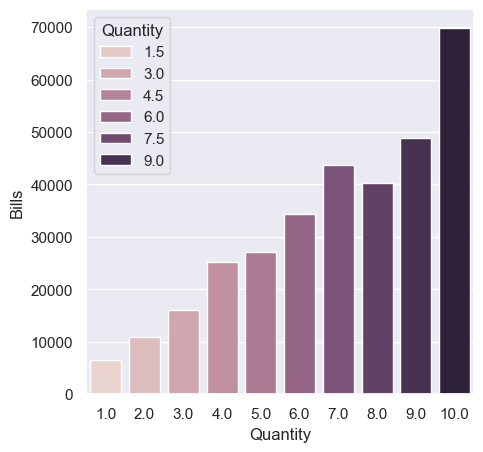

In [23]:
# Total Bills vs 
sales = df.groupby(['Quantity'], as_index=False)['Bills'].sum().sort_values(by='Bills', ascending=False)

sns.barplot(x = 'Quantity',y= 'Bills' ,data = sales,hue = 'Quantity')

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Bills, dtype: float64


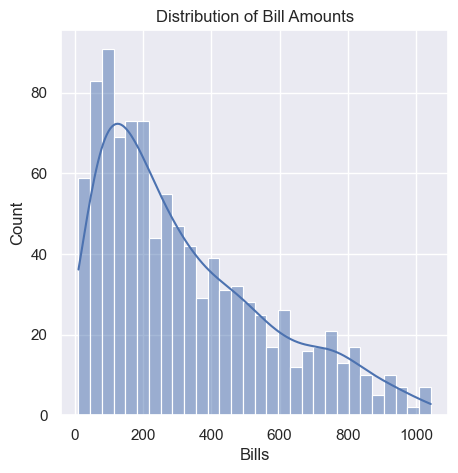

In [24]:
#Basic statistics & distribution plot for Bills
print(df['Bills'].describe())
sns.histplot(df['Bills'], bins=30, kde=True)
plt.title('Distribution of Bill Amounts')
plt.show()


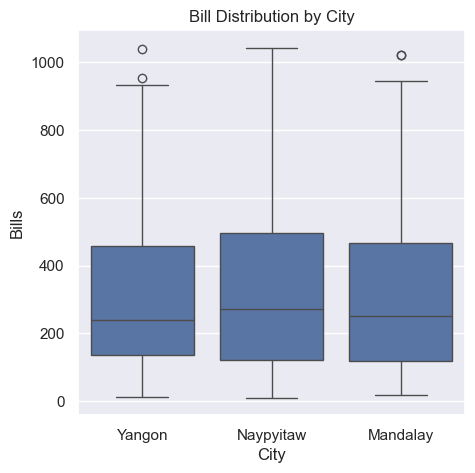

In [25]:
#Visualize Bills by City
sns.boxplot(x='City', y='Bills', data=df)
plt.title('Bill Distribution by City')
plt.show()

<Axes: xlabel='Unit price', ylabel='Bills'>

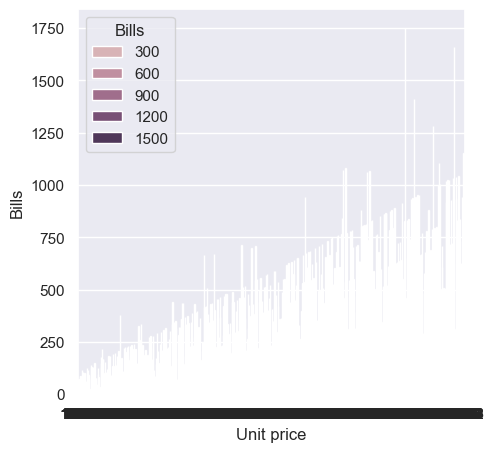

In [26]:
# total number of orders from top 10 states

sales_state = df.groupby(['Unit price'], as_index=False)['Bills'].sum().sort_values(by='Bills', ascending=False)

sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data = sales_state, x = 'Unit price',y= 'Bills',hue = 'Bills')

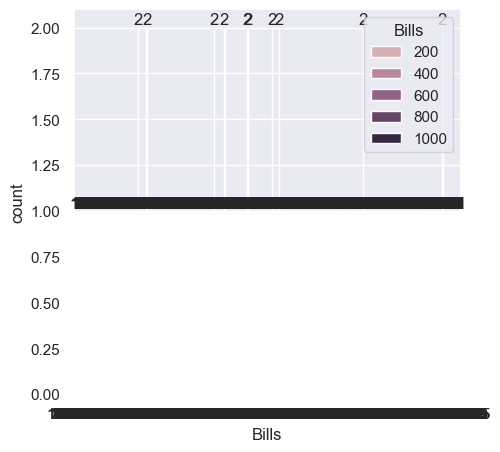

In [27]:
ax = sns.countplot(data = df, x = 'Bills',hue = 'Bills')

sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

*From above graphs we can see that most of the Bills and Count*

In [28]:
#Encode categorical variables
cat_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [29]:
#Define features and target variable
features = df_encoded.drop(columns=['Invoice ID', 'Date', 'Time', 'Bills', 'Shop Opening Year'])
target = df_encoded['Bills']

In [30]:
#Split dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [31]:
#Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
#Predict Bills on test data
y_pred = model.predict(X_test)


In [33]:
#Evaluate model performance
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R-squared score: {r2_score(y_test, y_pred):.2f}')

Mean Squared Error: 0.00
R-squared score: 1.00


<Axes: >

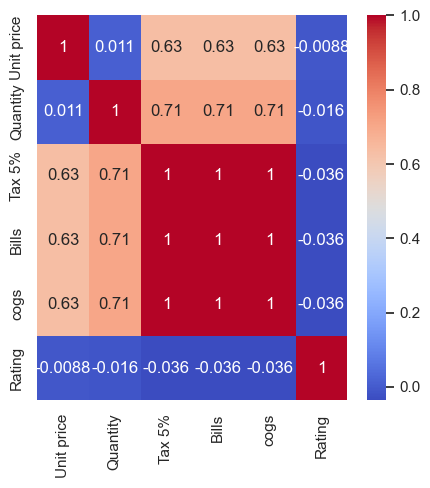

In [34]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


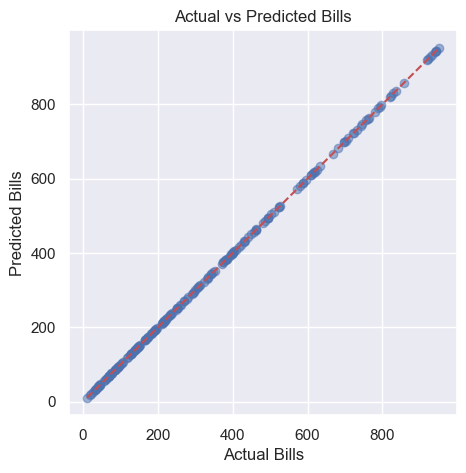

In [35]:
#Plot Actual vs Predicted Bills
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Bills')
plt.ylabel('Predicted Bills')
plt.title('Actual vs Predicted Bills')
plt.show()

### Quantity

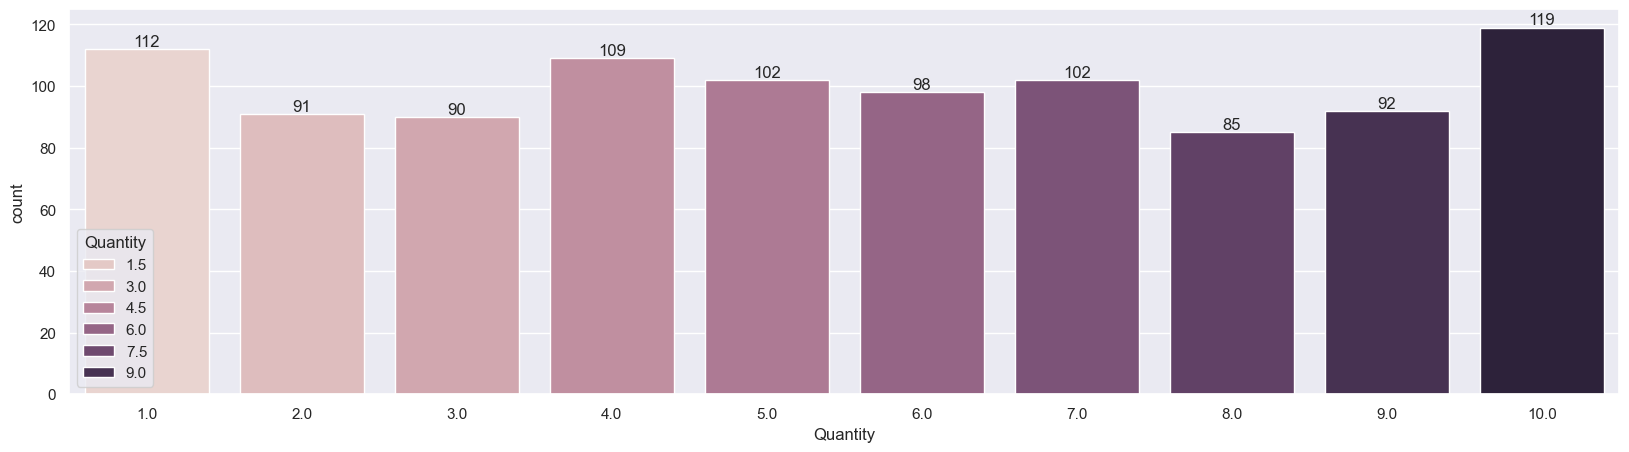

In [36]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Quantity',hue = 'Quantity')

for bars in ax.containers:
    ax.bar_label(bars)

### City

<Axes: xlabel='City', ylabel='Bills'>

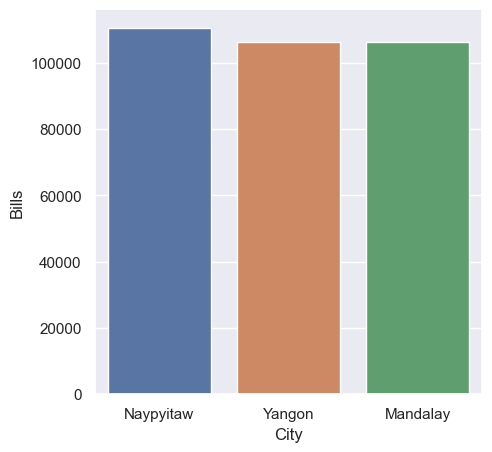

In [82]:
sales_state = df.groupby(['City'], as_index=False)['Bills'].sum().sort_values(by='Bills', ascending=False)

sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data = sales_state, x = 'City',y= 'Bills',hue = 'City')

<Axes: xlabel='Invoice ID', ylabel='Bills'>

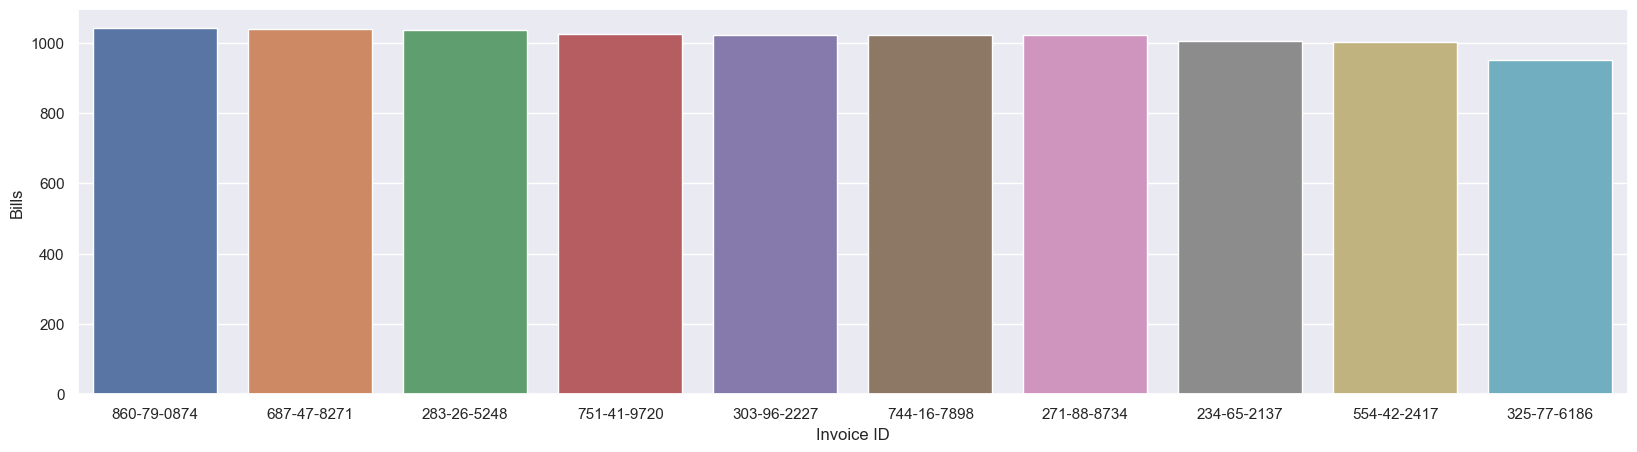

In [89]:
sales_state = df.groupby(['Invoice ID'], as_index=False)['Bills'].sum().sort_values(by='Bills', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Invoice ID',y= 'Bills', hue = 'Invoice ID')

In [84]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Bills', 'Date',
       'Time', 'Payment', 'cogs', 'Rating', 'Shop Opening Year'],
      dtype='object')

<Axes: xlabel='Date', ylabel='Bills'>

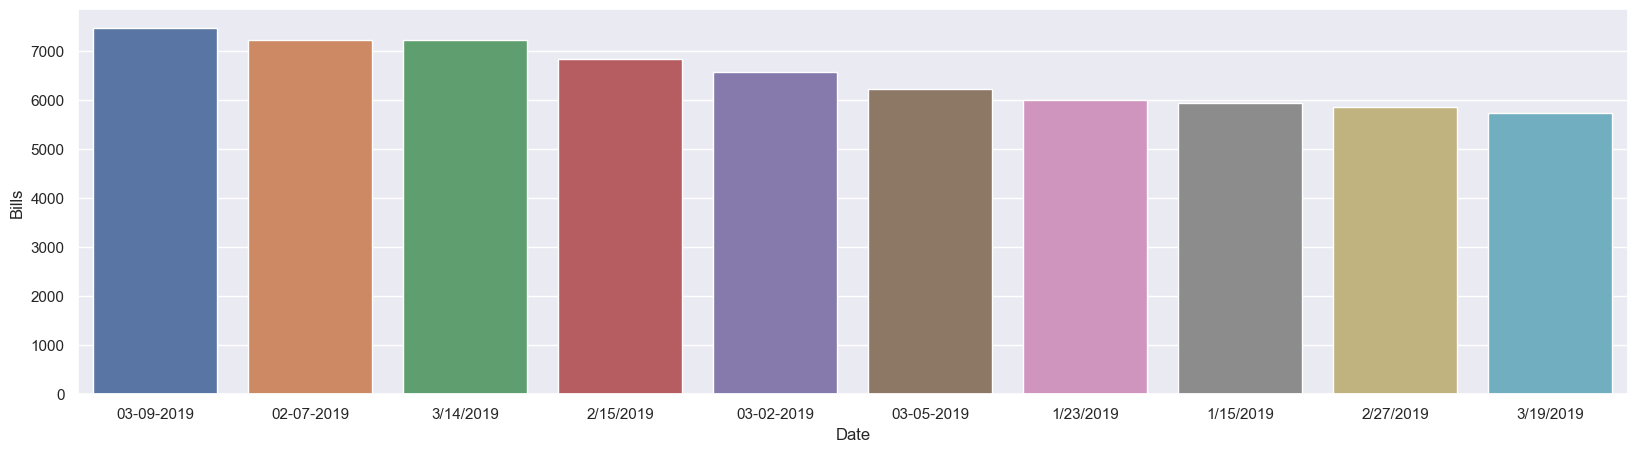

In [85]:
sales_state = df.groupby(['Date'], as_index=False)['Bills'].sum().sort_values(by='Bills', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Date',y= 'Bills', hue = 'Date')

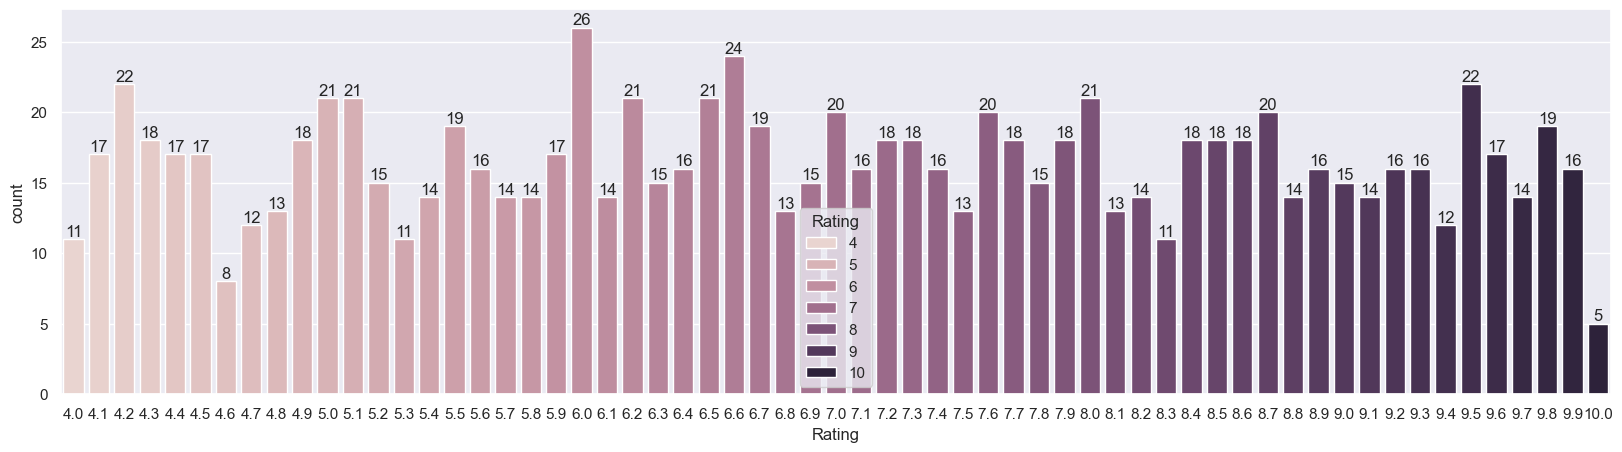

In [41]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Rating',hue = 'Rating')

for bars in ax.containers:
    ax.bar_label(bars)

# PROJECT GUIDE : VIRENDRA PAL


*POINT 1:Run each step in a separate Jupyter Notebook cell to explore and predict the bill amounts interactively. This will let you clean data, visualize, build a simple predictive model, and evaluate its performance.*

*POINT 2:This code excludes non-numeric columns from correlation computation, avoiding conversion errors. Typically for correlation, focus only on numeric variables such as 'Unit price', 'Quantity', 'Tax 5%', 'Bills', 'Rating', etc.*

*POINT 3: This structured workflow guides you from raw data loading through EDA, visualization, modeling, and evaluation for exploratory bill prediction in a Jupyter Notebook setting.*
# Full Project Tasks
*Here is a step-by-step summary of all the key tasks covered for Exploratory Bill Prediction with your dataset, written in points:*

*1.	Import necessary libraries 
Use pandas, matplotlib, seaborn for data handling and visualization, sklearn for modeling.*

*2.	Load the data
Read the "bills.csv" file into a pandas DataFrame.*

*3.	Inspect the data
View the first few rows and get data types and missing values info.*

*4.	Data type conversion
Convert 'Date' column to datetime format to enable time-based analysis.*

*5.	Rename columns
Rename the 'Total' column to 'Bills' for clarity.*

*6.	Basic statistics and distribution analysis
Generate summary statistics of the 'Bills' column and visualize its distribution with a histogram.*

*7.	Visualization by categories
Plot the distribution of bill amounts by categories such as 'City' or 'Product line' using boxplots.*

*8.	Correlation analysis
Compute correlation matrix on numeric columns only and visualize it with a heatmap.*

*9. Data preparation for modeling
Encode categorical variables into dummy/indicator variables.*

*10. Feature and target selection
Select features (excluding ID, date, etc.) and define the target variable as 'Bills'.

*11.Splitting dataset
Split data into training and testing sets.*

*12. Model training
Train a linear regression model on the training dataset.*

*13.	Prediction and evaluation
Predict bills on test data, calculate mean squared error and R-squared score.*

*14.	Model performance visualization
Plot actual versus predicted bill amounts to assess model fit graphically.*

*15.	Common errors & fixes
  o Avoid running correlation on non-numeric columns to prevent conversion errors.
  o Use correct matplotlib/seaborn syntax (e.g., no hue in plt.title()).*
